In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [4]:
df = pd.read_csv("C:/Users/Shourya Sharma/Desktop/Churn_Modelling.csv")  


In [6]:
df

,RowNumber,CustomerId,Surname,Credit Score,Geography,Gender,Age,Tenure,Balance,Num of Dependents,Has CrCard,Is Active Member,Estimated Salary,Exited
0,1,15634602,Hargrave,619.0,France,Female,42,2.0,3000,1,1.0,1.0,101348.88,1
1,2,15647311,Hill,608.0,Spain,Female,41,1.0,83807.86,1,0.0,1.0,112542.58,0
2,3,15619304,Onio,502.0,France,Female,42,8.0,159660.8,3,1.0,0.0,113931.57,1
3,4,15701354,Boni,699.0,France,Female,39,1.0,3000,2,0.0,0.0,93826.63,0
4,5,15737888,Mitchell,850.0,Spain,Female,43,2.0,125510.82,1,1.0,1.0,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7119,7120,15672754,Burbidge,498.0,Germany,Male,42,3.0,152039.7,1,1.0,1.0,53445.17,1
7120,7121,15768163,Griffin,655.0,Germany,Female,46,7.0,137145.12,1,1.0,0.0,115146.40,1
7121,7122,15769959,Ajuluchukwu,597.0,France,Female,53,4.0,88381.21,1,1.0,0.0,69384.71,1
7122,7123,15584532,Liu,709.0,France,Female,36,7.0,3000,1,0.0,1.0,42085.58,1


In [59]:
print(df.info())
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7124 entries, 0 to 7123
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Credit Score       7118 non-null   float64
 1   Age                7124 non-null   float64
 2   Tenure             7110 non-null   float64
 3   Balance            7124 non-null   float64
 4   Num of Dependents  7124 non-null   int64  
 5   Has CrCard         7111 non-null   float64
 6   Is Active Member   7114 non-null   float64
 7   Estimated Salary   7123 non-null   float64
 8   Exited             7124 non-null   int64  
 9   Geography_France   7124 non-null   uint8  
 10  Geography_Germany  7124 non-null   uint8  
 11  Geography_Spain    7124 non-null   uint8  
dtypes: float64(7), int64(2), uint8(3)
memory usage: 521.9 KB
None
       Credit Score          Age       Tenure        Balance  \
count   7118.000000  7124.000000  7110.000000    7124.000000   
mean     649.687412    39.

In [60]:
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Age'].fillna(df['Age'].mean(), inplace=True)

In [61]:
df['Balance'] = pd.to_numeric(df['Balance'], errors='coerce')
df['Balance'].fillna(df['Balance'].mean(), inplace=True)

In [62]:
df.replace([np.inf, -np.inf], np.nan, inplace=True)
df.dropna(inplace=True)

In [63]:
label_encoders = {}
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

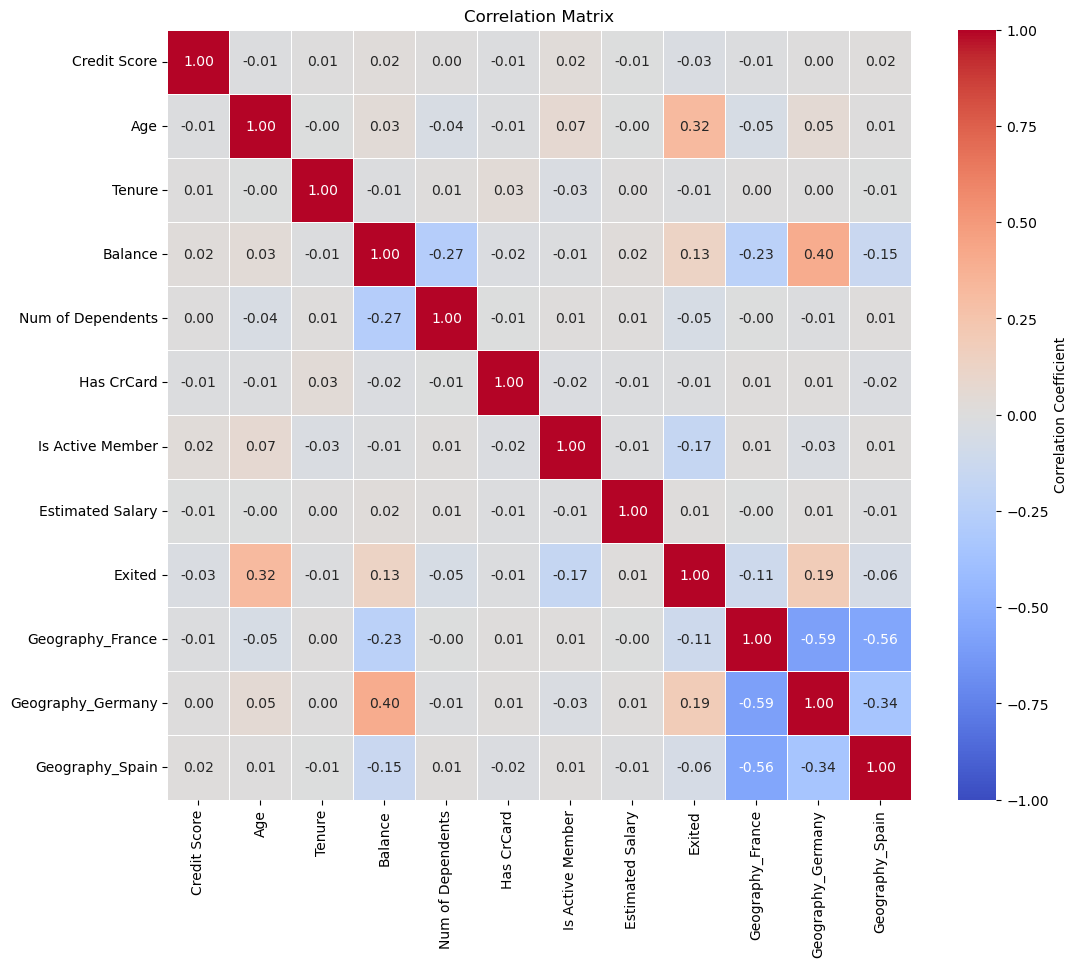

In [64]:
plt.figure(figsize=(12, 10))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5,
            cbar_kws={'label': 'Correlation Coefficient'}, vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [65]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
scaling_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'EstimatedSalary']
scaling_columns = [col for col in scaling_columns if col in X_train.columns]

In [68]:
scaler = StandardScaler()
X_train[scaling_columns] = scaler.fit_transform(X_train[scaling_columns])
X_test[scaling_columns] = scaler.transform(X_test[scaling_columns])

In [73]:
rf = RandomForestClassifier(random_state=42, class_weight='balanced')
rf.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [74]:
y_pred = rf.predict(X_test)

In [75]:
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy Score: 0.8224101479915433

Confusion Matrix:
 [[951  67]
 [185 216]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.93      0.88      1018
           1       0.76      0.54      0.63       401

    accuracy                           0.82      1419
   macro avg       0.80      0.74      0.76      1419
weighted avg       0.82      0.82      0.81      1419



ROC AUC Score: 0.8439889960756263


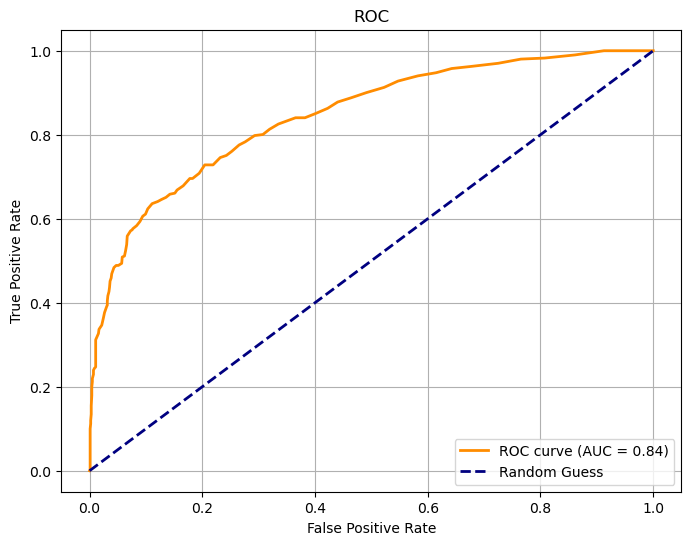

In [77]:
from sklearn.metrics import roc_auc_score, roc_curve

# Get prediction probabilities for the positive class (1)
y_proba = rf.predict_proba(X_test)[:, 1]

# Calculate ROC AUC Score
roc_auc = roc_auc_score(y_test, y_proba)
print("ROC AUC Score:", roc_auc)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_proba)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


# The objective was to predict whether a customer will default and churn from their bank account.

# After preprocessing the dataset and training classification models, we found that our best model achieved an ROC AUC score of 0.844, suggesting it has strong discriminatory power. This means the model can correctly rank churners vs. non-churners 84.4% of the time.

# The model enables the bank to proactively target high-risk customers with tailored retention strategies, potentially reducing churn and improving long-term profitability.